In [1]:
#!pip3 install qiskit
#!pip3 install pylatexenc

In [12]:
from qiskit import *
import numpy as np
from scipy.stats import norm
from matplotlib import pyplot as plt
from scipy.stats import rv_continuous

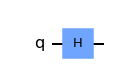

In [3]:
circ = QuantumCircuit(1);
circ.h(0);
circ.draw('mpl')

In [4]:
backend = Aer.get_backend('statevector_simulator')

In [5]:
def Haar(F,N):
    if F<0 or F>1:
        return 0;
    return (N-1)*(1-F)**(N-2);
class Haar_dist(rv_continuous):
    def _pdf(self,x):
        return Haar(x,1*2);

In [6]:
def kl_divergence(p, q):
    return np.mean(p*np.log(p/q));
    #return np.sum(np.where(p != 0, p * np.log(p / q), 0))

In [7]:
"""
x = np.arange(-10, 10, 0.001)
p = norm.pdf(x, 0, 2)
q = norm.pdf(x, 2, 2)
plt.title('KL(P||Q) = %1.3f' % kl_divergence(p, q))
plt.plot(x, p)
plt.plot(x, q, c='red')
p
"""


"\nx = np.arange(-10, 10, 0.001)\np = norm.pdf(x, 0, 2)\nq = norm.pdf(x, 2, 2)\nplt.title('KL(P||Q) = %1.3f' % kl_divergence(p, q))\nplt.plot(x, p)\nplt.plot(x, q, c='red')\np\n"

In [8]:
def PQC(th):
    backend = Aer.get_backend('statevector_simulator');
    circ = QuantumCircuit(1);
    circ.h(0);
    circ.rz(th,0);
    #circ.draw('mpl')
    result = execute(circ,backend).result() # Do the simulation, returning the result
    out_state = result.get_statevector();
    return np.asmatrix(out_state).T

In [9]:
len = 1000;
arr = [];
for i in range(len):
    t1 = np.random.uniform(0,2*np.pi);
    t2 = np.random.uniform(0,2*np.pi);
    fid = np.abs(PQC(t1).getH()*PQC(t2))**2;
    arr.append(fid[0,0]);
#print(arr)

In [10]:
haar = [];
h = Haar_dist(a=0,b=1,name="haar");
for i in range(len):   
    haar.append(h.ppf((i+0.5)/len))

# print(haar)
h.ppf(0.3) # inverse cdf

0.3

(array([58., 25., 22., 15., 10., 13., 14., 12., 14.,  8.,  9., 11., 10.,
         9., 12., 10.,  6., 10., 11., 11.,  7., 15.,  9.,  7.,  9.,  7.,
         5., 11., 11.,  6.,  6.,  6.,  8.,  9.,  7.,  2.,  8.,  4.,  7.,
         9., 10.,  7.,  4.,  8.,  6.,  6.,  9.,  3.,  5.,  7.,  4.,  6.,
        10.,  5.,  2., 13.,  8.,  5.,  4.,  5.,  9.,  5.,  7.,  9.,  3.,
        11.,  1.,  7.,  4.,  5.,  4., 10.,  8.,  8., 10.,  1.,  8.,  6.,
         7.,  8.,  9.,  7.,  5.,  4., 15., 11.,  7.,  9., 11.,  8., 10.,
        15., 12., 15., 17., 19., 21., 17., 32., 55.]),
 array([1.17337155e-05, 1.00114964e-02, 2.00112592e-02, 3.00110219e-02,
        4.00107846e-02, 5.00105473e-02, 6.00103100e-02, 7.00100727e-02,
        8.00098355e-02, 9.00095982e-02, 1.00009361e-01, 1.10009124e-01,
        1.20008886e-01, 1.30008649e-01, 1.40008412e-01, 1.50008174e-01,
        1.60007937e-01, 1.70007700e-01, 1.80007463e-01, 1.90007225e-01,
        2.00006988e-01, 2.10006751e-01, 2.20006514e-01, 2.30006276e-01,
  

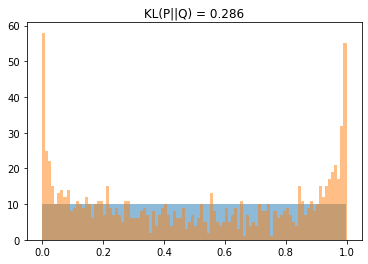

In [11]:
plt.title('KL(P||Q) = %1.3f' % kl_divergence(np.array(arr), np.array(haar)))
n_bins = 100;
# We can set the number of bins with the `bins` kwarg
# haar = np.linspace(0,1,len,endpoint=False); #true value
plt.hist(np.array(haar), bins=n_bins, alpha=0.5)
plt.hist(np.array(arr), bins=n_bins, alpha=0.5)